In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../scripts/')
import manage_files as mf
import relaxation_times as rt
import average_correl_functions as acf

gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


In [2]:
def plot_exp(exp,axis_id):
    """Plots experimental data with error ranges"""
    try:
        ax[axis_id[0],axis_id[1]].plot(exp[:,0],(1/exp[:,1]+1/exp[:,2])/2,"s",color="black",markersize=1.5,label="Experiment")
        ax[axis_id[0],axis_id[1]].errorbar(exp[:,0],(1/exp[:,1]+1/exp[:,2])/2,yerr=np.abs(1/exp[:,1]-1/exp[:,2])/2,fmt="none",
                     color="black",elinewidth=6)
        aver=(1/exp[:,1]+1/exp[:,2])/2
        stde=np.abs(1/exp[:,1]-1/exp[:,2])/2
        ax[axis_id[0],axis_id[1]].fill_between(exp[:,0],aver-stde,aver+stde,color="black",alpha=0.2)
    except:
        ax[axis_id[0],axis_id[1]].plot(exp[0],(1/exp[1]+1/exp[2])/2,"s",color="black",markersize=1.5,label="Experiment")
        ax[axis_id[0],axis_id[1]].errorbar(exp[0],(1/exp[1]+1/exp[2])/2,yerr=np.abs(1/exp[1]-1/exp[2])/2,fmt="none",
                     color="black",elinewidth=6)
        aver=(1/exp[1]+1/exp[2])/2
        stde=np.abs(1/exp[1]-1/exp[2])/2
        ax[axis_id[0],axis_id[1]].fill_between(exp[0],[aver-stde],[aver+stde],color="black",alpha=0.2)

<H3>Load experimental data for empty mielles</H3>

In [3]:

exp_T1_alpha_293K=np.loadtxt("experimental_data/4_Experiment_alpha_R1_different_magnetic_fields_293K.out")
exp_T2_alpha_293K=np.loadtxt("experimental_data/5_Experiment_alpha_R2_different_magnetic_fields_293K.out")
exp_T1_gamma_293K=np.loadtxt("experimental_data/4_Experiment_gamma_R1_different_magnetic_fields_293K.out")
exp_T2_gamma_293K=np.loadtxt("experimental_data/5_Experiment_gamma_R2_different_magnetic_fields_293K.out")
exp_T1_omega_293K=np.loadtxt("experimental_data/4_Experiment_omega_R1_different_magnetic_fields_293K.out")
exp_T2_omega_293K=np.loadtxt("experimental_data/5_Experiment_omega_R2_different_magnetic_fields_293K.out")

exp_T1_alpha_307K=np.loadtxt("experimental_data/4_Experiment_alpha_R1_different_magnetic_fields_307K.out")
exp_T2_alpha_307K=np.loadtxt("experimental_data/5_Experiment_alpha_R2_different_magnetic_fields_307K.out")
exp_T1_gamma_307K=np.loadtxt("experimental_data/4_Experiment_gamma_R1_different_magnetic_fields_307K.out")
exp_T2_gamma_307K=np.loadtxt("experimental_data/5_Experiment_gamma_R2_different_magnetic_fields_307K.out")
exp_T1_omega_307K=np.loadtxt("experimental_data/4_Experiment_omega_R1_different_magnetic_fields_307K.out")
exp_T2_omega_307K=np.loadtxt("experimental_data/5_Experiment_omega_R2_different_magnetic_fields_307K.out")

<H3>Load timescales (and SRD) caculated from simulations</H3>
This loads in all the data data that are in the folders

In [4]:
output_path_relax="../../relax_times_yamls/SDS/average_over_SDS/"            # folder to save spin relaxation times yaml files, 
                                     
output_path_timescales="../../timescales_yamls/SDS/average_over_SDS/"  # folder to save timescale yaml files
                                     
relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)
timescales_yamls=acf.set_biggest_ts_to_zero(timescales_yamls) # remove artificial weights of slow timescales 

Spin relaxation data exist for:

   * empty_60SDS_micelle_CHARMM36_OPC_10fsSF_307K_replica1
   * empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_replica1
   * GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_23500water_replica1
   * empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_replica2
   * GWALP_monomer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_replica1
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_replica2
   * empty_60SDS_Na_DESAmber_TIP4P_293K_replica2_from_whole_charmm
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_repli

In [5]:
#select only the wanted systems
systems= ["empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_replica1",
                      "empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_replica2",
                      "empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_replica3",
                       "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_replica1",
                      "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_replica2",
                      "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_replica3",
                      "empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_replica3",
                      "empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_replica1",
                      "empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_replica2",
                      "empty_60SDS_Na_DESAmber_TIP4P_307K_10fsSF_replica1",
                     "empty_60SDS_Na_DESAmber_TIP4P_307K_10fsSF_replica2",
                     "empty_60SDS_Na_DESAmber_TIP4P_307K_10fsSF_replica3",
                     "empty_60SDS_Na_DESAmber_TIP4P_307K_replica2_from_whole_charmm",
                      "empty_60SDS_Na_DESAmber_TIP4P_293K_replica2_from_whole_charmm",
                      "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_307K_replica1",
                     "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_307K_replica2",
                     "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_307K_replica3",
                       "empty_60SDS_micelle_CHARMM36_OPC_10fsSF_307K_replica1",
                      "empty_60SDS_micelle_CHARMM36_OPC_10fsSF_307K_replica2",
                      "empty_60SDS_micelle_CHARMM36_OPC_10fsSF_307K_replica3",
                       "empty_60SDS_micelle_CHARMM36_OPC_10psSF_replica1",
                        "empty_60SDS_micelle_CHARMM36_OPC_10psSF_replica2",
                       "empty_60SDS_10psSF_replica2",
        "empty_60SDS_micelle_CHARMM36_TIP3P_replica1"]



<H3>Claculates SRT for selected fields and residues for all the systems listed above</H3>

In [6]:
OP=0 # order parameter
smallest_corr_time=-3 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=6 # same as above
N_exp_to_fit=500 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/10 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
fields=[2.35,5.99,8.49] #2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
fields=np.linspace(2.35,8.49)
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 


residues={0:'alpha',2:'gamma',11:'omega'}
results={}


for system in systems:
    results[system]={}
    for res,resname in residues.items():
        results[system][resname]=[[],[]]
    
    maxlen=0
        
    for ana in timescales_yamls[system]:
        info=timescales_yamls[system][ana]["info"]
        if (info['03_N_exp_to_fit']==N_exp_to_fit and
            info['04_smallest_corr_time_[s]']==10**(smallest_corr_time-12)
           and info['05_biggest_corr_time_[s]']==10**(biggest_corr_time-12)
           and info["06_analyze"]==analyze):
            if info['08_corr_func_length_[ps]']>maxlen:
                analysis=ana
            maxlen=max(maxlen,info['08_corr_func_length_[ps]'])
        
    for B in fields:
        """For all fields goes throught residues alpha (0), gamma (2), omega (11).
              - extracts T1, T2 values as a list"""
        for residue,resname in residues.items():
            T1, T2, NOE = rt.choose_nuclei[nuclei](B,timescales_yamls[system][analysis]["results"]["Coeff"][residue],timescales_yamls[system][analysis]["results"]["Ctime"],OP)
            results[system][resname][0].append(float(T1))
            results[system][resname][1].append(float(T2))
            

<H3>Plot at 293 K</H3>

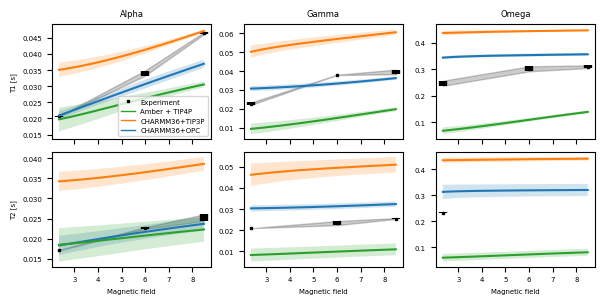

In [7]:
average=["empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_replica",
       "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_replica",
        "empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_replica"]

plt.rcParams["figure.figsize"] = [6,3]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})

fig, ax = plt.subplots(2,3,sharex=True)
    
ax[0,0].set_ylabel("T1 [s]")


ax[1,0].set_ylabel("T2 [s]")
ax[1,0].set_xlabel("Magnetic field")
ax[1,1].set_xlabel("Magnetic field")
ax[1,2].set_xlabel("Magnetic field")
max_T1=0
max_T2=0
max_noe=0
min_noe=0

    
marksi=5

plot_exp(exp_T1_alpha_293K,(0,0))
plot_exp(exp_T1_gamma_293K,(0,1))
plot_exp(exp_T1_omega_293K,(0,2))
plot_exp(exp_T2_alpha_293K,(1,0))
plot_exp(exp_T2_gamma_293K,(1,1))
plot_exp(exp_T2_omega_293K,(1,2))


for i,sim in enumerate(average):
    aver=(np.array(results[sim+"1"]["alpha"][0])+
          np.array(results[sim+"2"]["alpha"][0])+
          np.array(results[sim+"3"]["alpha"][0]))/3
    stde=[np.std([results[sim+"1"]["alpha"][0][i],
                  results[sim+"2"]["alpha"][0][i],
                  results[sim+"3"]["alpha"][0][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[0,0].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[0,0].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    aver=(np.array(results[sim+"1"]["gamma"][0])+
          np.array(results[sim+"2"]["gamma"][0])+
          np.array(results[sim+"3"]["gamma"][0]))/3
    stde=[np.std([results[sim+"1"]["gamma"][0][i],
                  results[sim+"2"]["gamma"][0][i],
                  results[sim+"3"]["gamma"][0][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[0,1].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[0,1].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    
    aver=(np.array(results[sim+"1"]["omega"][0])+
          np.array(results[sim+"2"]["omega"][0])+
          np.array(results[sim+"3"]["omega"][0]))/3
    stde=[np.std([results[sim+"1"]["omega"][0][i],
                  results[sim+"2"]["omega"][0][i],
                  results[sim+"3"]["omega"][0][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[0,2].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[0,2].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    
    aver=(np.array(results[sim+"1"]["alpha"][1])+
          np.array(results[sim+"2"]["alpha"][1])+
          np.array(results[sim+"3"]["alpha"][1]))/3
    stde=[np.std([results[sim+"1"]["alpha"][1][i],
                  results[sim+"2"]["alpha"][1][i],
                  results[sim+"3"]["alpha"][1][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[1,0].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[1,0].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    aver=(np.array(results[sim+"1"]["gamma"][1])+
          np.array(results[sim+"2"]["gamma"][1])+
          np.array(results[sim+"3"]["gamma"][1]))/3
    stde=[np.std([results[sim+"1"]["gamma"][1][i],
                  results[sim+"2"]["gamma"][1][i],
                  results[sim+"3"]["gamma"][1][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[1,1].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[1,1].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    
    aver=(np.array(results[sim+"1"]["omega"][1])+
          np.array(results[sim+"2"]["omega"][1])+
          np.array(results[sim+"3"]["omega"][1]))/3
    stde=[np.std([results[sim+"1"]["omega"][1][i],
                  results[sim+"2"]["omega"][1][i],
                  results[sim+"3"]["omega"][1][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[1,2].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[1,2].fill_between(fields,aver-stde,aver+stde,alpha=0.2)

ax[0,0].plot(fields[0],results["empty_60SDS_Na_DESAmber_TIP4P_293K_replica2_from_whole_charmm"]["alpha"][0][0],"-",c="C2",linewidth=1,label="Amber + TIP4P")
ax[0,0].plot(fields[0],results["empty_60SDS_micelle_CHARMM36_TIP3P_replica1"]["alpha"][0][0],"-",c="C1",linewidth=1,label="CHARMM36+TIP3P")

ax[0,0].plot(fields[0],(np.array(results["empty_60SDS_10psSF_replica2"]["alpha"][0][0])+
                np.array(results["empty_60SDS_micelle_CHARMM36_OPC_10psSF_replica1"]["alpha"][0][0]))/2,"-",c="C0",linewidth=1,label="CHARMM36+OPC")


ax[0,0].legend(prop={'size':5},loc=0)
ax[0,0].set_title("Alpha")
ax[0,1].set_title("Gamma")
ax[0,2].set_title("Omega")
plt.savefig("empty_relax_times_293K.pdf")

<H3>Plot at 307 K</H3>

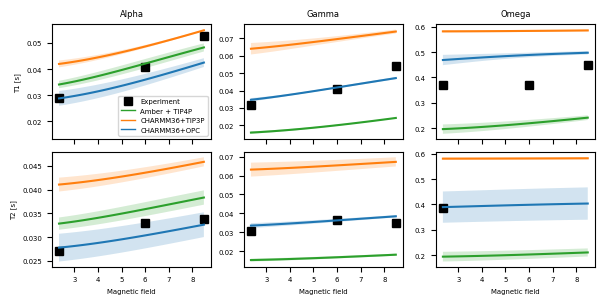

In [8]:
average=["empty_60SDS_micelle_CHARMM36_OPC_10fsSF_307K_replica",
    "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_307K_replica",    
    "empty_60SDS_Na_DESAmber_TIP4P_307K_10fsSF_replica"]

plt.rcParams["figure.figsize"] = [6,3]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})

fig, ax = plt.subplots(2,3,sharex=True)
    
ax[0,0].set_ylabel("T1 [s]")


ax[1,0].set_ylabel("T2 [s]")
ax[1,0].set_xlabel("Magnetic field")
ax[1,1].set_xlabel("Magnetic field")
ax[1,2].set_xlabel("Magnetic field")
max_T1=0
max_T2=0
max_noe=0
min_noe=0

    
marksi=5

ax[0,0].plot(exp_T1_alpha_307K[:,0],1/exp_T1_alpha_307K[:,1],"s",color="black",label="Experiment")
ax[0,1].plot(exp_T1_gamma_307K[:,0],1/exp_T1_gamma_307K[:,1],"s",color="black")
ax[0,2].plot(exp_T1_omega_307K[:,0],1/exp_T1_omega_307K[:,1],"s",color="black")
ax[1,0].plot(exp_T2_alpha_307K[:,0],1/exp_T2_alpha_307K[:,1],"s",color="black")
ax[1,1].plot(exp_T2_gamma_307K[:,0],1/exp_T2_gamma_307K[:,1],"s",color="black")
ax[1,2].plot(exp_T2_omega_307K[0],1/exp_T2_omega_307K[1],"s",color="black")


for i,sim in enumerate(average):
    aver=(np.array(results[sim+"1"]["alpha"][0])+
          np.array(results[sim+"2"]["alpha"][0])+
          np.array(results[sim+"3"]["alpha"][0]))/3
    stde=[np.std([results[sim+"1"]["alpha"][0][i],
                  results[sim+"2"]["alpha"][0][i],
                  results[sim+"3"]["alpha"][0][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[0,0].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[0,0].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    aver=(np.array(results[sim+"1"]["gamma"][0])+
          np.array(results[sim+"2"]["gamma"][0])+
          np.array(results[sim+"3"]["gamma"][0]))/3
    stde=[np.std([results[sim+"1"]["gamma"][0][i],
                  results[sim+"2"]["gamma"][0][i],
                  results[sim+"3"]["gamma"][0][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[0,1].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[0,1].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    
    aver=(np.array(results[sim+"1"]["omega"][0])+
          np.array(results[sim+"2"]["omega"][0])+
          np.array(results[sim+"3"]["omega"][0]))/3
    stde=[np.std([results[sim+"1"]["omega"][0][i],
                  results[sim+"2"]["omega"][0][i],
                  results[sim+"3"]["omega"][0][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[0,2].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[0,2].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    
    aver=(np.array(results[sim+"1"]["alpha"][1])+
          np.array(results[sim+"2"]["alpha"][1])+
          np.array(results[sim+"3"]["alpha"][1]))/3
    stde=[np.std([results[sim+"1"]["alpha"][1][i],
                  results[sim+"2"]["alpha"][1][i],
                  results[sim+"3"]["alpha"][1][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[1,0].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[1,0].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    aver=(np.array(results[sim+"1"]["gamma"][1])+
          np.array(results[sim+"2"]["gamma"][1])+
          np.array(results[sim+"3"]["gamma"][1]))/3
    stde=[np.std([results[sim+"1"]["gamma"][1][i],
                  results[sim+"2"]["gamma"][1][i],
                  results[sim+"3"]["gamma"][1][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[1,1].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[1,1].fill_between(fields,aver-stde,aver+stde,alpha=0.2)
    
    
    aver=(np.array(results[sim+"1"]["omega"][1])+
          np.array(results[sim+"2"]["omega"][1])+
          np.array(results[sim+"3"]["omega"][1]))/3
    stde=[np.std([results[sim+"1"]["omega"][1][i],
                  results[sim+"2"]["omega"][1][i],
                  results[sim+"3"]["omega"][1][i]])/np.sqrt(3)
                 for i in range(len(fields))]
    ax[1,2].plot(fields,aver,"-",c="C"+str(i),markersize=2)
    ax[1,2].fill_between(fields,aver-stde,aver+stde,alpha=0.2)

ax[0,0].plot(fields[0],results["empty_60SDS_Na_DESAmber_TIP4P_293K_replica2_from_whole_charmm"]["alpha"][0][0],"-",c="C2",linewidth=1,label="Amber + TIP4P")
ax[0,0].plot(fields[0],results["empty_60SDS_micelle_CHARMM36_TIP3P_replica1"]["alpha"][0][0],"-",c="C1",linewidth=1,label="CHARMM36+TIP3P")

ax[0,0].plot(fields[0],(np.array(results["empty_60SDS_10psSF_replica2"]["alpha"][0][0])+
                np.array(results["empty_60SDS_micelle_CHARMM36_OPC_10psSF_replica1"]["alpha"][0][0]))/2,"-",c="C0",linewidth=1,label="CHARMM36+OPC")


ax[0,0].legend(prop={'size':5},loc=0)
ax[0,0].set_title("Alpha")
ax[0,1].set_title("Gamma")
ax[0,2].set_title("Omega")

plt.savefig("empty_relax_times_307.pdf")

<H3>Export simulation results for SRT</H3>

In [9]:
average=["empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_replica",
       "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_replica",
        "empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_replica",
        "empty_60SDS_micelle_CHARMM36_OPC_10fsSF_307K_replica",
    "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_307K_replica",    
    "empty_60SDS_Na_DESAmber_TIP4P_307K_10fsSF_replica"]

for i,sim in enumerate(average):
    for resname in residues.values():
        for exp_ID in range(2):
            aver=(np.array(results[sim+"1"][resname][exp_ID])+
                  np.array(results[sim+"2"][resname][exp_ID])+
                  np.array(results[sim+"3"][resname][exp_ID]))/3
            stde=[np.std([results[sim+"1"][resname][exp_ID][i],
                          results[sim+"2"][resname][exp_ID][i],
                          results[sim+"3"][resname][exp_ID][i]])/np.sqrt(3)
                         for i in range(len(fields))]
            to_save=[fields,aver,stde]
            
            save_name=f'exported_simulation_results/SRT/T{exp_ID+1}_{resname}_{sim[:-8]}.dat'
            np.savetxt(save_name,np.transpose(to_save),header=f" Data for: {sim[:-8]} \n Bond: {resname} \n Relaxation experiment: T{exp_ID+1} \n Magnetic field [T], Average T{exp_ID+1} SRT [s], Error SRT [s]")


<H3>Get and plot effective times</H3>

In [10]:
effective_times={}
systems=["empty_60SDS_micelle_CHARMM36_OPC_10psSF_307K_replica1",
         "empty_60SDS_micelle_CHARMM36_TIP3P_10psSF_307K_replica3",
         "empty_60SDS_Na_DESAmber_TIP4P_307K_replica2_from_whole_charmm"]

#systems=["empty_60SDS_micelle_CHARMM36_OPC_10fsSF_293K_average",
#         "empty_60SDS_micelle_CHARMM36_TIP3P_10fsSF_average",
#         "empty_60SDS_Na_DESAmber_TIP4P_293K_10fsSF_average"]


for system in systems:
    effective_times[system]=np.zeros(12)
    for bond in timescales_yamls[system]["analysis0"]["results"]["Coeff"]:

        effTime=sum(t*k for t,k in zip(timescales_yamls[system]["analysis0"]["results"]["Coeff"][bond],
                      timescales_yamls[system]["analysis0"]["results"]["Ctime"]))
        effective_times[system][int(bond)]=effTime

empty_60SDS_micelle_CHARMM36_OPC_10psSF_307K_replica1
empty_60SDS_micelle_CHARMM36_TIP3P_10psSF_307K_replica3
empty_60SDS_Na_DESAmber_TIP4P_307K_replica2_from_whole_charmm


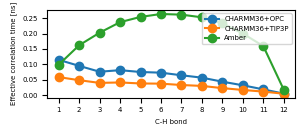

In [11]:
plt.rcParams["figure.figsize"] = [3,1.3]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 5})
labels=["CHARMM36+OPC","CHARMM36+TIP3P","Amber"]
x=np.linspace(1,12,12)
for i,system in enumerate(effective_times):
    print(system)
    plt.plot(x,effective_times[system]*10**9,"o-",label=labels[i])
    
plt.xticks(x)
    
#for i,system in enumerate(effective_times):
#    print(system)
#    plt.plot(x,effective_times[system]*10**9,"--",c="C"+str(i))
    
plt.xlabel("C-H bond")
plt.ylabel("Effective correlation time [ns]")
plt.legend(loc=1)
plt.savefig("eff_times_307K.pdf")

In [12]:
for system in systems:
    to_save=[x,effective_times[system]*10**9]
    save_name=f'exported_simulation_results/effective_times/effective_time_{system}.dat'
    np.savetxt(save_name,np.transpose(to_save),header=f" Data for: {sim[:-9]} \n Bond, Effective time [ns]")
